# Run from the command line

We created the input files and then the configuration files, we can now run the command line tool, check the logs and inspect the results.

In [1]:
!strun image2.cfg asn_subtract_bg_flat.json

2018-10-23 17:01:36,511 - stpipe - WARNING - /home/azonca/anaconda3/envs/jwst_dev/lib/python3.6/site-packages/photutils/background/core.py:71: AstropyDeprecationWarning: "iters" was deprecated in version 3.1 and will be removed in a future version. Use argument "maxiters" instead.
  def __init__(self, sigma_clip=SigmaClip(sigma=3., iters=5)):

2018-10-23 17:01:36,512 - stpipe - WARNING - /home/azonca/anaconda3/envs/jwst_dev/lib/python3.6/site-packages/photutils/background/core.py:114: AstropyDeprecationWarning: "iters" was deprecated in version 3.1 and will be removed in a future version. Use argument "maxiters" instead.
  def __init__(self, sigma_clip=SigmaClip(sigma=3., iters=5)):

2018-10-23 17:01:36,514 - stpipe - WARNING - /home/azonca/anaconda3/envs/jwst_dev/lib/python3.6/site-packages/photutils/background/background_2d.py:285: AstropyDeprecationWarning: "iters" was deprecated in version 3.1 and will be removed in a future version. Use argument "maxiters" instead.
  sigma_clip=Si

We can now load the results

In [2]:
from jwst.datamodels import ImageModel
stpipe_bg_subtract_flat = ImageModel.from_fits("test_iris_subtract_bg_flat_cal.fits")

The pipeline automatically adds metadata to the file to track what analysis modules were executed:

In [3]:
for k,v in stpipe_bg_subtract_flat.meta.items():
    print(k,"=", v)

asn.pool_name = pool
asn.table_name = asn_subtract_bg_flat.json
cal_step.back_sub = COMPLETE
cal_step.flat_field = COMPLETE
calibration_software_revision = 4b5e3932
calibration_software_version = 0.11.0.dev1+g4b5e3932
date = 2018-10-23T17:01:40.128
exposure.type = NRC_IMAGE
filename = test_iris_subtract_bg_flat_cal.fits
instrument.detector = NRCA1
instrument.name = NIRCAM
model_type = ImageModel
ref_file.crds.context_used = jwst_0493.pmap
ref_file.crds.sw_version = 7.2.6
ref_file.flat.name = flat.fits
subarray.name = FULL
subarray.xsize = 2048
subarray.xstart = 1
subarray.ysize = 2048
subarray.ystart = 1


We can then plot the result

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

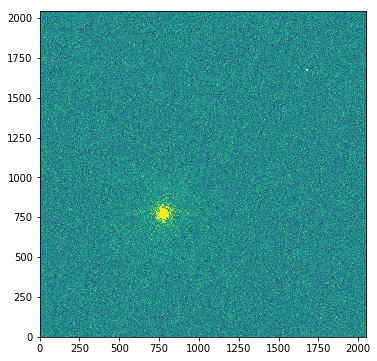

In [10]:
plt.figure(figsize=(6,6))
plt.subplot()
plt.imshow(stpipe_bg_subtract_flat.data, origin='lower', vmax=100)